In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
os.chdir("C:\\Users\\Divya\\Desktop\\Folder")

In [3]:
movie_data = pd.read_csv("movies.dat", sep='::', engine='python', encoding= 'latin1')
movie_data.columns=['MovieID', 'MovieName', 'Genres']
movie_data.dropna(inplace=True)
movie_data.head()

,MovieID,MovieName,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
movie_data.shape

(3882, 3)

In [5]:
rating_data = pd.read_csv("ratings.dat", sep='::', engine='python', encoding= 'latin1')
rating_data.columns=['ID','MovieID', 'Ratings', 'Timestamp']
rating_data.dropna(inplace=True)
rating_data.head()

,ID,MovieID,Ratings,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [6]:
rating_data.shape

(1000208, 4)

In [7]:
user_data = pd.read_csv("users.dat", sep='::', engine='python', encoding= 'latin1')
user_data.columns=['UserID','Gender', 'Age', 'Category', 'Zip-code']
user_data.dropna(inplace=True)
user_data.head()

,UserID,Gender,Age,Category,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [8]:
user_data.shape

(6039, 5)

In [9]:
dataset=pd.concat([movie_data, rating_data, user_data], axis=1)
dataset.head()


,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Category,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [10]:
dataset.shape

(1000208, 12)

In [11]:
dataset.isnull().sum()

MovieID      996326
MovieName    996326
Genres       996326
ID                0
MovieID           0
Ratings           0
Timestamp         0
UserID       994169
Gender       994169
Age          994169
Category     994169
Zip-code     994169
dtype: int64

In [12]:
unique_genres=dataset['Genres'].unique()
print("unique_genres:" , unique_genres)

unique_genres: ["Adventure|Children's|Fantasy" 'Comedy|Romance' 'Comedy|Drama' 'Comedy'
 'Action|Crime|Thriller' "Adventure|Children's" 'Action'
 'Action|Adventure|Thriller' 'Comedy|Drama|Romance' 'Comedy|Horror'
 "Animation|Children's" 'Drama' 'Action|Adventure|Romance'
 'Drama|Thriller' 'Drama|Romance' 'Thriller' 'Action|Comedy|Drama'
 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance' 'Adventure|Sci-Fi'
 'Adventure|Romance' "Children's|Comedy|Drama" 'Documentary' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure' 'Crime|Thriller'
 "Animation|Children's|Musical|Romance" 'Action|Drama|Thriller'
 "Children's|Comedy" 'Drama|Mystery' 'Sci-Fi|Thriller'
 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Adventure|Drama' 'Action|Thriller'
 "Adventure|Children's|Comedy|Musical" 'Action|Drama|War'
 'Action|Adventure|Crime' 'Crime' 'Drama|Mystery|Romance' 'Action|Drama'
 'Drama|Romance|War' 'Horror' 'Action|Adventure|Comedy|Crime' 'Comedy|War'
 'Action|Adventure|Myst

In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
attributes=["MovieName", "Genres", "Gender", "Age", "Ratings"]
dataset.dropna(subset=attributes, inplace=True)
missing_value=dataset.isna().sum()
print(missing_value)

MovieID      0
MovieName    0
Genres       0
ID           0
MovieID      0
Ratings      0
Timestamp    0
UserID       0
Gender       0
Age          0
Category     0
Zip-code     0
dtype: int64


In [15]:
dataset

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Category,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,3948.0,Meet the Parents (2000),Comedy,28,334,4,978125960,3879.0,M,25.0,3.0,83687
3878,3949.0,Requiem for a Dream (2000),Drama,28,266,2,978982323,3880.0,M,25.0,7.0,54942
3879,3950.0,Tigerland (2000),Drama,28,2174,3,978126491,3881.0,M,18.0,2.0,44515
3880,3951.0,Two Family House (2000),Drama,28,912,5,978985294,3882.0,M,56.0,14.0,55337


In [16]:
top_rated_movies=dataset[["MovieName", "Ratings"]]
print(top_rated_movies)

                               MovieName  Ratings
0                         Jumanji (1995)        3
1                Grumpier Old Men (1995)        3
2               Waiting to Exhale (1995)        4
3     Father of the Bride Part II (1995)        5
4                            Heat (1995)        3
...                                  ...      ...
3877             Meet the Parents (2000)        4
3878          Requiem for a Dream (2000)        2
3879                    Tigerland (2000)        3
3880             Two Family House (2000)        5
3881               Contender, The (2000)        4

[3882 rows x 2 columns]


## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

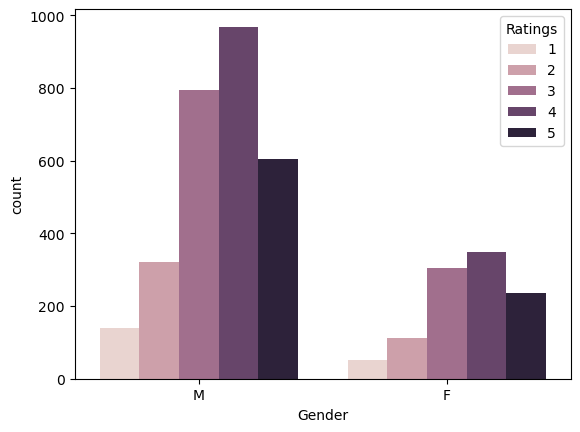

In [17]:
sns.countplot(x=dataset['Gender'], hue=dataset['Ratings'])

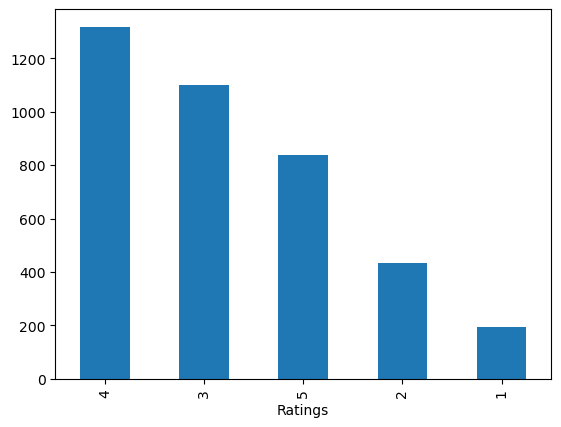

In [18]:
dataset['Ratings'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

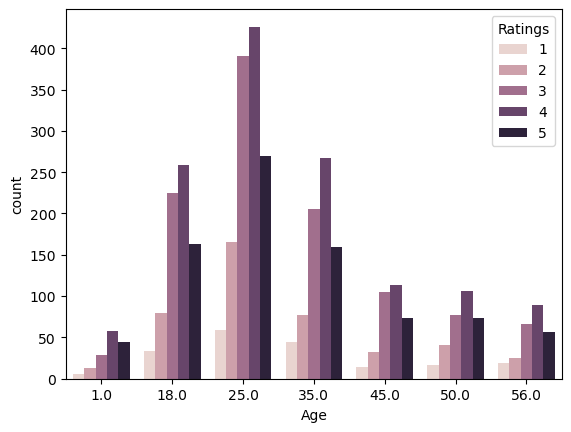

In [19]:
sns.countplot(x=dataset['Age'], hue=dataset['Ratings'])

In [20]:
dataset.head()

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Category,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [21]:
columns_to_drop = ["MovieName", "Genres", "MovieID", "Timestamp", "Zip-code", "Ratings"]

missing_columns = [col for col in columns_to_drop if col not in dataset.columns]

if missing_columns:
    raise KeyError(f"Columns not found: {missing_columns}")

# Features
x = dataset.drop(columns=columns_to_drop)
y = dataset["Ratings"]

# Adjust test_size and random_state 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [22]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in x.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
scaled_data = pipeline.fit_transform(x)

# Create a df with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=[col for col in x.columns if col not in categorical_columns] +
                                               list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)))

print(scaled_df.head())

    ID    UserID       Age  Category  Gender_F  Gender_M
0  0.0  0.000000  1.000000      0.80       0.0       1.0
1  0.0  0.000258  0.436364      0.75       0.0       1.0
2  0.0  0.000515  0.800000      0.35       0.0       1.0
3  0.0  0.000773  0.436364      1.00       0.0       1.0
4  0.0  0.001031  0.890909      0.45       1.0       0.0


## Logistic Regression

In [23]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in x_train.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

# Train the model on the training data
pipeline.fit(x_train, y_train)  

# Predictions on the testing data
y_pred = pipeline.predict(x_test) 

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  

print(f"Accuracy: {accuracy}")

Accuracy: 0.3564993564993565


In [24]:
x_test_transformed = pipeline.named_steps['preprocessor'].transform(x_test)

# predictions on the transformed test data
predictions = pipeline.named_steps['classifier'].predict(x_test_transformed)


In [25]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.35      0.29      0.32       210\n           4       0.36      0.82      0.50       263\n           5       0.14      0.01      0.01       189\n\n    accuracy                           0.36       777\n   macro avg       0.17      0.22      0.17       777\nweighted avg       0.25      0.36      0.26       777\n'

In [26]:
accuracy_score(y_test,predictions)

0.3564993564993565

## Kneighbors Classifier

In [27]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in x_train.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Train the model on the training data
pipeline.fit(x_train, y_train)

# predictions on the testing data
y_pred_labels = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.2985842985842986


In [28]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.35      0.29      0.32       210\n           4       0.36      0.82      0.50       263\n           5       0.14      0.01      0.01       189\n\n    accuracy                           0.36       777\n   macro avg       0.17      0.22      0.17       777\nweighted avg       0.25      0.36      0.26       777\n'

In [29]:
confusion_matrix(y_test,predictions)

array([[  0,   0,  10,  30,   0],
       [  0,   0,  28,  46,   1],
       [  0,   0,  61, 148,   1],
       [  0,   0,  44, 215,   4],
       [  0,   0,  31, 157,   1]], dtype=int64)

In [30]:
accuracy_score(y_test,predictions)

0.3564993564993565

## Naive Bayes

In [31]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in x_train.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])

# Train the model on the training data
pipeline.fit(x_train, y_train)

# predictions on the testing data
y_pred_labels = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)

print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.3410553410553411
Confusion Matrix:
[[  0   0  15  24   1]
 [  0   0  43  25   7]
 [  0   0  80 117  13]
 [  0   0  65 174  24]
 [  0   0  42 136  11]]


In [32]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.35      0.29      0.32       210\n           4       0.36      0.82      0.50       263\n           5       0.14      0.01      0.01       189\n\n    accuracy                           0.36       777\n   macro avg       0.17      0.22      0.17       777\nweighted avg       0.25      0.36      0.26       777\n'

## SVC

In [33]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in x_train.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC())])

# Train the model on the training data
pipeline.fit(x_train, y_train)

# predictions on the testing data
y_pred_labels = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)

print(f"Accuracy: {accuracy}")

# Print classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:")
print(class_report)


Accuracy: 0.3564993564993565
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        75
           3       0.34      0.24      0.28       210
           4       0.36      0.85      0.51       263
           5       0.43      0.02      0.03       189

    accuracy                           0.36       777
   macro avg       0.22      0.22      0.16       777
weighted avg       0.32      0.36      0.25       777



In [34]:
confusion_matrix(y_test,predictions)

array([[  0,   0,  10,  30,   0],
       [  0,   0,  28,  46,   1],
       [  0,   0,  61, 148,   1],
       [  0,   0,  44, 215,   4],
       [  0,   0,  31, 157,   1]], dtype=int64)

In [35]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.35      0.29      0.32       210\n           4       0.36      0.82      0.50       263\n           5       0.14      0.01      0.01       189\n\n    accuracy                           0.36       777\n   macro avg       0.17      0.22      0.17       777\nweighted avg       0.25      0.36      0.26       777\n'

In [36]:
accuracy_score(y_test,predictions)

0.3564993564993565

## Decision Tree Classifier

In [37]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in x_train.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

# Train the model on the training data
pipeline.fit(x_train, y_train)

# predictions on the testing data
y_pred_labels = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
class_report = classification_report(y_test, y_pred_labels)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")

# Print predictions
print("Predictions:")
print(y_pred_labels)


# Print classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:")
print(class_report)


Accuracy: 0.2702702702702703
Predictions:
[3 3 4 3 3 4 3 5 4 4 3 2 2 5 4 5 3 4 4 2 4 4 5 4 2 5 4 1 3 5 4 4 2 4 5 4 4
 3 1 4 4 3 5 3 5 3 5 4 2 4 5 4 1 4 3 3 5 2 3 4 2 4 4 4 5 4 2 1 4 2 2 5 5 3
 5 5 5 2 2 2 2 3 4 5 3 4 1 4 2 4 4 3 4 4 5 3 5 5 4 5 5 5 3 5 5 5 4 5 5 5 4
 1 3 3 3 1 3 4 5 4 3 3 5 3 1 3 5 4 4 2 4 5 3 4 4 4 3 4 4 4 2 4 4 2 2 1 4 4
 3 5 3 2 3 4 5 3 5 1 3 5 4 4 4 3 5 5 3 1 5 4 5 4 4 3 1 5 4 2 4 3 2 3 5 5 4
 3 2 1 5 4 3 3 1 4 4 3 4 5 4 3 5 3 2 5 3 2 4 4 4 2 4 4 5 5 4 2 4 1 4 4 3 3
 2 1 4 2 1 3 4 5 3 4 2 4 5 2 2 3 4 3 3 5 5 1 4 4 2 3 4 5 4 4 1 4 2 3 3 1 3
 2 4 4 5 5 3 3 4 4 4 5 5 3 4 3 3 4 4 4 4 5 4 3 5 4 5 4 3 5 5 4 4 3 4 5 5 3
 4 3 3 5 3 4 4 1 4 2 3 4 4 4 4 4 4 5 2 3 3 4 5 1 5 4 4 4 3 2 5 5 3 3 3 4 3
 2 5 3 5 5 2 3 5 4 5 5 5 4 3 5 2 4 4 3 5 5 3 4 1 5 4 4 3 4 4 4 5 4 2 3 5 4
 5 2 2 5 1 4 3 2 2 2 5 4 3 3 5 5 5 3 3 1 4 3 3 5 4 4 3 5 2 3 4 5 3 1 4 5 4
 5 4 4 1 3 4 2 5 3 2 4 4 3 3 3 5 4 3 5 3 5 4 4 1 4 3 3 3 4 5 4 3 1 4 3 3 3
 5 4 3 1 4 5 5 1 4 2 3 3 4 2 2 4 1 3 3 5 4 4 3 3 5 3 2 4 3

In [38]:
confusion_matrix(y_test,predictions)

array([[  0,   0,  10,  30,   0],
       [  0,   0,  28,  46,   1],
       [  0,   0,  61, 148,   1],
       [  0,   0,  44, 215,   4],
       [  0,   0,  31, 157,   1]], dtype=int64)

In [39]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.35      0.29      0.32       210\n           4       0.36      0.82      0.50       263\n           5       0.14      0.01      0.01       189\n\n    accuracy                           0.36       777\n   macro avg       0.17      0.22      0.17       777\nweighted avg       0.25      0.36      0.26       777\n'

In [40]:
accuracy_score(y_test,predictions)

0.3564993564993565

## Random Forest Classifier

In [41]:
categorical_columns = ['Gender']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in x_train.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

# Train the model on the training data
pipeline.fit(x_train, y_train)

# predictions on the testing data
y_pred_labels = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
class_report = classification_report(y_test, y_pred_labels)
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.2882882882882883
Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.05      0.07        40
           2       0.13      0.12      0.13        75
           3       0.27      0.30      0.28       210
           4       0.32      0.37      0.34       263
           5       0.33      0.29      0.31       189

    accuracy                           0.29       777
   macro avg       0.23      0.22      0.23       777
weighted avg       0.28      0.29      0.28       777

Confusion Matrix:
[[ 2  5 20  9  4]
 [ 2  9 24 27 13]
 [ 4 26 62 89 29]
 [ 6 17 77 96 67]
 [ 4 10 43 77 55]]


In [42]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.35      0.29      0.32       210\n           4       0.36      0.82      0.50       263\n           5       0.14      0.01      0.01       189\n\n    accuracy                           0.36       777\n   macro avg       0.17      0.22      0.17       777\nweighted avg       0.25      0.36      0.26       777\n'